In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from models import MeshModel
from models.mesh_generation import apply_spherical_harm_pulsation
import jax.numpy as jnp
import jax

In [2]:
m = MeshModel(n_vertices=1000,
                radius=1.0,
                timestamps=jnp.linspace(0., 100., 50))


In [3]:
m.apply_rotation(100., 70.);
coords = m.centers
los_vels = m.get_los_velocities()

In [4]:
m.apply_pulsation(2., 1., 2., 0., 10.);

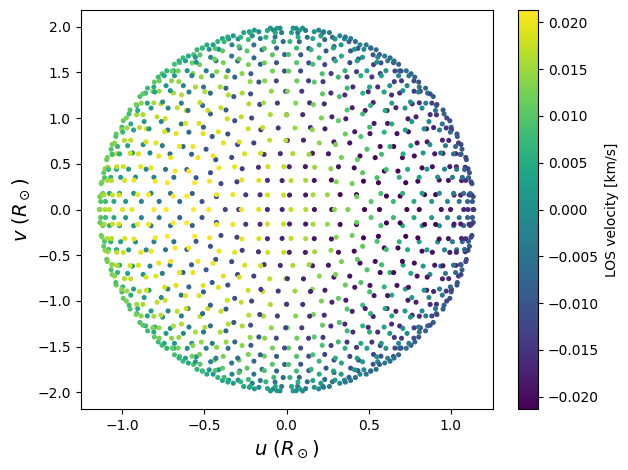

In [10]:
plt.figure()
i = 15
plt.scatter(coords[i, :, 2], coords[i, :, 1], marker='o',c=los_vels[0],s=7)
plt.xlabel(r'$u$ ($R_\odot$)',fontsize=14)
plt.ylabel(r'$v$ ($R_\odot$)',fontsize=14)
plt.colorbar(label=r'LOS velocity [km/s]')
plt.tight_layout()
plt.show()

In [11]:
LOG_WAVELENGTHS = jnp.linspace(jnp.log10(5885), jnp.log10(5895), 500)
atmo = m.model_spectrum(0, LOG_WAVELENGTHS, 0.5*np.ones((1, 20)))

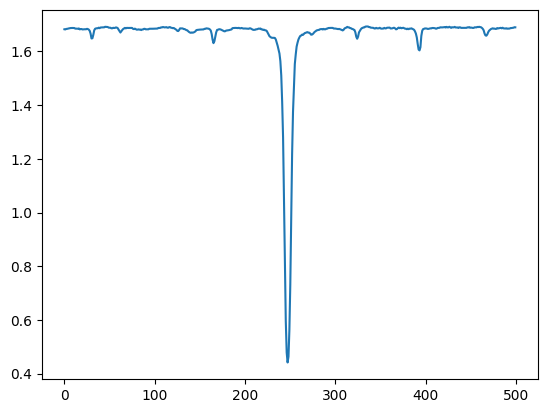

In [12]:
plt.plot(atmo[0])